In [1]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from ClusteringGroundTruth import cluster_gt
np.random.seed(42)

In [2]:
from TestCaseGenerator import data_RLClustering
X, M, T_P, N, d = data_RLClustering(4)

beta_min = 0.1
beta_max = 10000.0
tau = 1.5

rho = np.ones(N) / N  # Uniform weights
Y = np.random.randn(M, 2)

In [3]:
Y, pi, Y_list, pi_list = cluster_gt(
    X, Y, rho, T_P, beta_min=0.1, beta_max=10000.0, tau=1.5
)

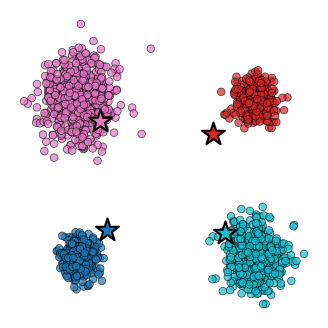

In [4]:
from Plotter import PlotClustering
PlotClustering(X, Y, pi, figsize=(6, 4), save_path=None)

In [5]:
from animator import animate_Clusters

animate_Clusters(
    X,
    Y_list,
    pi_list,
    figuresize=(6, 5),
    interval=400,
    save_path="phase_transition_clustering.gif",
)

# Save Data

In [6]:
import pickle
with open("Results/idx_4_GT_Y.pkl", "wb") as f:
    pickle.dump((Y), f)
